In [49]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv(r"D:\Project\ALL CSV\20191226-reviews.csv")
df

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN


In [7]:
df.sort_values("rating",ascending=False)

,asin,name,rating,date,verified,title,body,helpfulVotes
33993,B06Y16RL4W,Jenn Marie,5,"March 5, 2018",True,Beautiful. Easy to use,"Beautiful. Easy to use, easy to start up. Plac...",NaN
41137,B076XLLCQC,taquilla love,5,"August 17, 2019",True,Great phone,Phone works great even better than my iPhone I...,NaN
41107,B076XLLCQC,Carlos Chavez EC107Q56689N,5,"December 9, 2019",True,👍,👍,NaN
41108,B076XLLCQC,Judy Godar,5,"October 17, 2019",True,I love it and it's just as advertised,I have no problems yet I have not activated it...,NaN
41109,B076XLLCQC,Amazon Customer,5,"September 24, 2019",True,Great,Just good as new,NaN
...,...,...,...,...,...,...,...,...
44425,B078RBVVCV,vincent oreski,1,"August 25, 2018",False,Sucksss,This phone sucks. GPS reallllllly sucks. The s...,1.0
44424,B078RBVVCV,L C.,1,"November 28, 2018",False,"Garbage, and 0 customer support",After about 5 weeks of usage it stopped workin...,NaN
44423,B078RBVVCV,sairam,1,"June 30, 2018",True,Camera,Crap 2000 model like.,NaN
44422,B078RBVVCV,Jim T,1,"May 15, 2018",False,"Budget phones are great in theory, but not wor...",The budget phone idea is great however you'd b...,6.0


In [16]:
print(df.shape)

(67986, 8)


<Axes: title={'center': 'Count of reviews by star'}, xlabel='rating'>

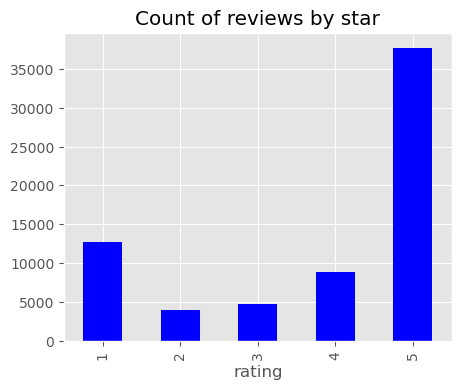

In [6]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
df['rating'].value_counts().sort_index().plot(
    kind="bar",title="Count of reviews by star",
    figsize=(5,4),color="blue"
)

In [7]:
example=df['body'][44422]
example

'The budget phone idea is great however you\'d be much better off just getting a legitimate phone. My g4 charging port broke right out of the year warranty and it bricked. I preordered this G5S Plus, I had network connectivity issues (Well documented, check online).... Support blamed it on my apps and had me reset them, it did not fix the problem. After 7 months the main in call phone speaker stopped working. Motorola initially offered to replace the phone under warranty then quickly took back their offer because my phone had a small crack in the bottom corner. THE MOTOROLA REPRESENTATIVE ON THE PHONE EVEN ADMITTED THAT THERE IS ALMOST NO CHANCE THAT THE SMALL CRACK CAUSED THESE ISSUES. However, because of this unrelated crack that does not affect functionality they said i would need to pay $100 to get their phone\'s issues fixed. They lowered their "fix it" price to $60, which is still unacceptable for a warranty repair. Connectivity issue: Phone calls intermittently do not come throu

In [8]:
import nltk
token=nltk.word_tokenize(example)
token[:10]

['The', 'budget', 'phone', 'idea', 'is', 'great', 'however', 'you', "'d", 'be']

In [10]:
 nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
tagged=nltk.pos_tag(token)
tagged

[('The', 'DT'),
 ('budget', 'NN'),
 ('phone', 'NN'),
 ('idea', 'NN'),
 ('is', 'VBZ'),
 ('great', 'JJ'),
 ('however', 'RB'),
 ('you', 'PRP'),
 ("'d", 'MD'),
 ('be', 'VB'),
 ('much', 'RB'),
 ('better', 'JJR'),
 ('off', 'RP'),
 ('just', 'RB'),
 ('getting', 'VBG'),
 ('a', 'DT'),
 ('legitimate', 'JJ'),
 ('phone', 'NN'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('g4', 'NN'),
 ('charging', 'VBG'),
 ('port', 'NN'),
 ('broke', 'VBD'),
 ('right', 'JJ'),
 ('out', 'IN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('year', 'NN'),
 ('warranty', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('bricked', 'VBD'),
 ('.', '.'),
 ('I', 'PRP'),
 ('preordered', 'VBD'),
 ('this', 'DT'),
 ('G5S', 'NNP'),
 ('Plus', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ('had', 'VBD'),
 ('network', 'NN'),
 ('connectivity', 'NN'),
 ('issues', 'NNS'),
 ('(', '('),
 ('Well', 'NNP'),
 ('documented', 'VBN'),
 (',', ','),
 ('check', 'VB'),
 ('online', 'NN'),
 (')', ')'),
 ('....', 'VBZ'),
 ('Support', 'NNP'),
 ('blamed', 'VBD'),
 ('it', 'PRP'),
 ('on', 'IN'),
 (

In [14]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
ntts=nltk.chunk.ne_chunk(tagged)
ntts.pprint()

(S
  The/DT
  budget/NN
  phone/NN
  idea/NN
  is/VBZ
  great/JJ
  however/RB
  you/PRP
  'd/MD
  be/VB
  much/RB
  better/JJR
  off/RP
  just/RB
  getting/VBG
  a/DT
  legitimate/JJ
  phone/NN
  ./.
  My/PRP$
  g4/NN
  charging/VBG
  port/NN
  broke/VBD
  right/JJ
  out/IN
  of/IN
  the/DT
  year/NN
  warranty/NN
  and/CC
  it/PRP
  bricked/VBD
  ./.
  I/PRP
  preordered/VBD
  this/DT
  G5S/NNP
  Plus/NNP
  ,/,
  I/PRP
  had/VBD
  network/NN
  connectivity/NN
  issues/NNS
  (/(
  (ORGANIZATION Well/NNP)
  documented/VBN
  ,/,
  check/VB
  online/NN
  )/)
  ..../VBZ
  (PERSON Support/NNP)
  blamed/VBD
  it/PRP
  on/IN
  my/PRP$
  apps/NN
  and/CC
  had/VBD
  me/PRP
  reset/VB
  them/PRP
  ,/,
  it/PRP
  did/VBD
  not/RB
  fix/VB
  the/DT
  problem/NN
  ./.
  After/IN
  7/CD
  months/NNS
  the/DT
  main/JJ
  in/IN
  call/NN
  phone/NN
  speaker/NN
  stopped/VBD
  working/VBG
  ./.
  (PERSON Motorola/NNP)
  initially/RB
  offered/VBD
  to/TO
  replace/VB
  the/DT
  phone/NN
  under/IN
  

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [17]:
sa=SentimentIntensityAnalyzer()

In [19]:
sa.polarity_scores(example)

{'neg': 0.081, 'neu': 0.855, 'pos': 0.064, 'compound': -0.4272}

In [24]:
sa.polarity_scores("this product is cheap")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [20]:
from tqdm import tqdm
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer


res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row["body"]
    # Check if the value in the "body" column is a string
    if isinstance(text, str):
        myid = row["asin"]
        res[myid] = sa.polarity_scores(text)

100%|██████████| 67986/67986 [03:33<00:00, 318.51it/s]


In [24]:
raghav=pd.DataFrame(res).T
raghav=raghav.reset_index().rename(columns={"index":"asin"})
raghav=raghav.merge(df,how='left')
raghav.head()

,asin,neg,neu,pos,compound,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,0.031,0.827,0.142,0.9556,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,0.031,0.827,0.142,0.9556,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,0.031,0.827,0.142,0.9556,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,0.031,0.827,0.142,0.9556,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,0.031,0.827,0.142,0.9556,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


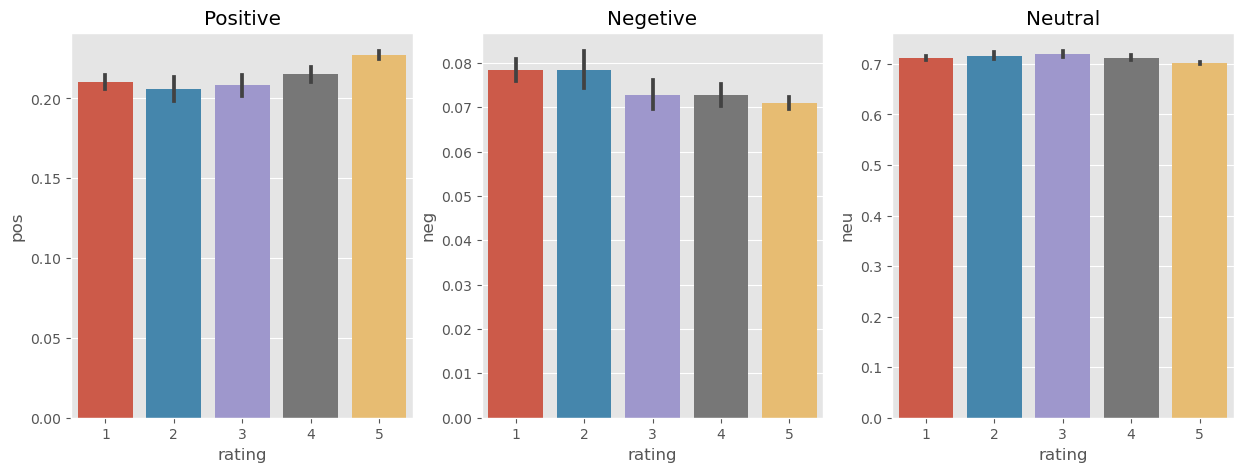

In [26]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=raghav,x='rating',y='pos',ax=axs[0])
sns.barplot(data=raghav,x='rating',y='neg',ax=axs[1])
sns.barplot(data=raghav,x='rating',y='neu',ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Negetive")
axs[2].set_title("Neutral")
plt.show()

In [29]:
data = df['title']  # Fix the variable name from 'ata' to 'data'
scores = []  # Initialize the scores list before use

for text in data:
    if isinstance(text, str):
        scores.append(sa.polarity_scores(text))
    else:
        scores.append(None)  # Handle non-string values

for i, score in enumerate(scores):
    if score is not None:
        print(f"Sentiment score for text {i+1}: {score}")
    else:
        print(f"Sentiment score for text {i+1}: None (non-string value)")


Sentiment score for text 1: {'neg': 0.206, 'neu': 0.376, 'pos': 0.418, 'compound': 0.5035}
Sentiment score for text 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment score for text 3: {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
Sentiment score for text 4: {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.6696}
Sentiment score for text 5: {'neg': 0.271, 'neu': 0.388, 'pos': 0.341, 'compound': 0.2244}
Sentiment score for text 6: {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}
Sentiment score for text 7: {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.3802}
Sentiment score for text 8: {'neg': 0.403, 'neu': 0.597, 'pos': 0.0, 'compound': -0.4019}
Sentiment score for text 9: {'neg': 0.0, 'neu': 0.224, 'pos': 0.776, 'compound': 0.5374}
Sentiment score for text 10: {'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'compound': -0.6369}
Sentiment score for text 11: {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.3716}
Sentiment score for text

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [38]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [40]:
def preprocess(text):
    tokens = nltk.word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(lemmas)

In [44]:
def preprocess(text):
    text = str(text)  # Convert any input into string
    tokens = nltk.word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(lemmas)

df['processed_text'] = df['title'].apply(preprocess)


In [50]:
df_numeric = df.drop(columns=['asin'])
df_numeric = df.select_dtypes(include=[np.number])

In [54]:
X = df_numeric.drop(columns=['rating'])
y = df_numeric['rating']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = model.predict(X_test)

In [64]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [65]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2.5217240156473575
R^2 Score: 0.0005535114740435887


In [67]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
29219,5,3.808671
57965,5,3.824100
48131,5,3.808671
15033,2,3.808671
66979,5,3.808671
...,...,...
46593,5,3.821912
41354,5,3.808671
8368,5,3.824100
53095,5,3.808671


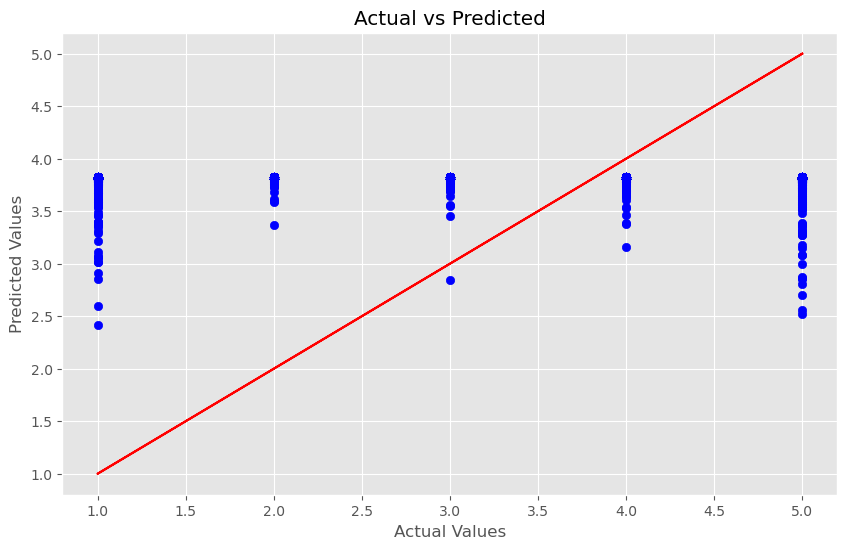

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')  # Scatter plot of actual vs. predicted
plt.plot(y_test, y_test, color='red')  # A reference line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

In [74]:
print("Accuracy(in %):", accuracy_score(y_test, y_pred)*100)

Accuracy(in %): 55.603765259597004
